# Identifying highly correlated gene/onts by spatial/readZs for punctate

Only using the BICCN dataset since it has both MERFISH (for input to SLRRP) and scRNAseq (for input to ReadZs)

In [1]:
import pandas as pd
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
import seaborn as sns
import glob
import os

import SRRS
from SRRS import scoring

In [2]:
srrs_to_readzs_onts = {
    'Astro_1':'Astro',
    'Astro_2':'Astro',
    'Endo':'Endo',
    'L23_IT_1':'L2/3 IT',
    'L23_IT_2':'L2/3 IT',
    'L23_IT_3':'L2/3 IT',
    'L23_IT_4':'L2/3 IT',
    'L23_IT_5':'L2/3 IT',
    'L5_ET_1':'L5 ET',
    'L5_ET_2':'L5 ET',
    'L5_ET_3':'L5 ET',
    'L5_ET_4':'L5 ET',
    'L5_ET_5':'L5 ET',
    'L5_IT_1':'L5 IT',
    'L5_IT_2':'L5 IT',
    'L5_IT_3':'L5 IT',
    'L5_IT_4':'L5 IT',
    'L56_NP_1':'L5/6 NP',
    'L56_NP_2':'L5/6 NP',
    'L6_CT_1':'L6 CT',
    'L6_CT_2':'L6 CT',
    'L6_CT_3':'L6 CT',
    'L6_CT_4':'L6 CT',
    'L6_CT_6':'L6 CT',
    'L6_CT_7':'L6 CT',
    'L6_IT_1':'L6 IT',
    'L6_IT_2':'L6 IT',
    'L6_IT_3':'L6 IT',
    'L6_IT_Car3':'L6 IT Car3',
    'L6b_1':'L6b',
    'L6b_3':'L6b',
    'Lamp5_1':'Lamp5',
    'Lamp5_2':'Lamp5',
    'Lamp5_3':'Lamp5',
    'Lamp5_4':'Lamp5',
    'Lamp5_5':'Lamp5',
    'Lamp5_6':'Lamp5',
    'Lamp5_7':'Lamp5',
    'Lamp5_8':'Lamp5',
    'Lamp5_9':'Lamp5',
    'OPC':'OPC',
    'Oligo_1':'Oligo',
    'Oligo_2':'Oligo',
    'Oligo_3':'Oligo',
    'Pvalb_1':'Pvalb',
    'Pvalb_10':'Pvalb',
    'Pvalb_11':'Pvalb',
    'Pvalb_2':'Pvalb',
    'Pvalb_3':'Pvalb',
    'Pvalb_4':'Pvalb',
    'Pvalb_5':'Pvalb',
    'Pvalb_6':'Pvalb',
    'Pvalb_7':'Pvalb',
    'Pvalb_8':'Pvalb',
    'Pvalb_9':'Pvalb',
    'SMC':'SMC',
    'Sncg_1':'Sncg',
    'Sncg_2':'Sncg',
    'Sst_1':'Sst',
    'Sst_2':'Sst',
    'Sst_3':'Sst',
    'Sst_4':'Sst',
    'Sst_5':'Sst',
    'Sst_6':'Sst',
    'Sst_7':'Sst',
    'Sst_8':'Sst',
    'Sst_Chodl':'Sst',
    'VLMC':'VLMC',
    'Vip_1':'Vip',
    'Vip_10':'Vip',
    'Vip_2':'Vip',
    'Vip_3':'Vip',
    'Vip_4':'Vip',
    'Vip_5':'Vip',
    'Vip_6':'Vip',
    'Vip_7':'Vip',
    'Vip_8':'Vip',
    'Vip_9':'Vip',
}

In [3]:
#Read in the gene/cell punctate scores for all mice/samples
f_paths = glob.glob('../../outputs/gene_cell/mouse?sample?_radial_scores.csv')

cell_gene_df = pd.DataFrame()

for f_path in f_paths:
    basename = os.path.basename(f_path).split('_')[0]
    mouse = int(basename[5])
    sample = int(basename[12])
    
    sample_df = pd.read_csv(f_path)
    sample_df['mouse'] = mouse
    sample_df['sample'] = sample
    
    cell_gene_df = pd.concat((cell_gene_df, sample_df))

cell_gene_df['annotation'] = cell_gene_df['annotation'].map(srrs_to_readzs_onts)
cell_gene_df = cell_gene_df.dropna() #remove annotations without mappings
cell_gene_df.head()

,metric,cell_id,annotation,num_spots,gene,num_gene_spots,score,variance,mouse,sample
21,radial,100123806067060025203221776241023194026,L6 CT,112,Pou3f3,3,0.612,1.644709e-06,1,5
22,radial,100123806067060025203221776241023194026,L6 CT,112,Cdh9,3,-0.096,1.644709e-06,1,5
23,radial,100123806067060025203221776241023194026,L6 CT,112,Wipf3,8,-0.786,5.101534e-07,1,5
24,radial,100123806067060025203221776241023194026,L6 CT,112,Nr4a1,3,0.036,1.644709e-06,1,5
25,radial,100123806067060025203221776241023194026,L6 CT,112,Prr16,2,0.996,4.072347e-06,1,5


In [4]:
#calculate gene/ontology scores for mouse1 and mouse2 separately
gene_ont_df = pd.concat(
    scoring.gene_celltype_scoring(g, min_cells_per_gene_ont=10, extra_cols={'mouse':'Spatial_m{}'.format(m)})
    for m,g in cell_gene_df.groupby('mouse')
)

gene_ont_df.head()

,experiment,sample,metric,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,z,p,bh_p,mouse
0,experiment1,5,radial,1700022I11Rik,L2/3 IT,58,2.0,610.5,0.135,214.837850,0.0,0.0,Spatial_m1
1,experiment1,5,radial,1700022I11Rik,L5 ET,14,2.0,1084.0,0.099,252.981200,0.0,0.0,Spatial_m1
2,experiment1,5,radial,1700022I11Rik,L5 IT,40,2.0,790.0,0.168,560.701297,0.0,0.0,Spatial_m1
3,experiment1,5,radial,1700022I11Rik,L6 CT,12,2.0,496.0,0.133,305.200816,0.0,0.0,Spatial_m1
4,experiment1,5,radial,1700022I11Rik,L6 IT,23,2.0,765.0,0.450,914.397309,0.0,0.0,Spatial_m1


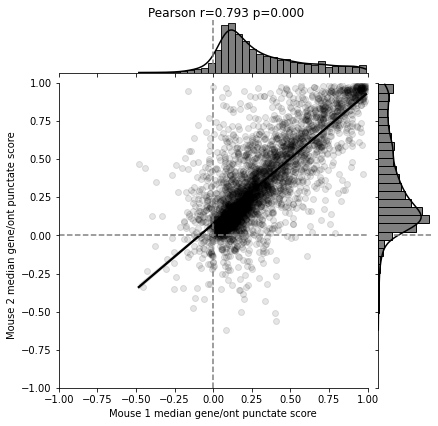

In [5]:
#Compare median punctate score per gene/ontology between mouse 1 and mouse 2
piv_df = gene_ont_df.pivot(
    index=['gene','annotation'],
    columns='mouse',
    values='med_score'
).dropna()

r,p = scp.stats.pearsonr(piv_df['Spatial_m1'],piv_df['Spatial_m2'])

g = sns.jointplot(
    x = 'Spatial_m1',
    y = 'Spatial_m2',
    kind = 'reg',
    color = 'black',
    scatter_kws = {'alpha':0.1},
    data = piv_df,
)
g.fig.subplots_adjust(top=0.95)
g.ax_joint.set_xlim(-1,1)
g.ax_joint.set_ylim(-1,1)
g.ax_joint.axhline(0, linestyle='dashed', color='grey')
g.ax_joint.axvline(0, linestyle='dashed', color='grey')
g.ax_marg_x.axvline(0, linestyle='dashed', color='grey')
g.ax_marg_y.axhline(0, linestyle='dashed', color='grey')
g.ax_joint.set_xlabel('Mouse 1 median gene/ont punctate score')
g.ax_joint.set_ylabel('Mouse 2 median gene/ont punctate score')
plt.suptitle('Pearson r={:.3f} p={:.3f}'.format(r,p))
plt.show()
plt.close()

In [6]:
readzs_df = pd.read_csv('../../outputs/readzs/UTR_level/MOp_10Xv3_no_unann_filt.csv')
readzs_df

,window,ontology_mouse,sum_counts_per_window_per_ont,med_counts_per_window_per_ont,median_z_scaled,chi2_p_val,perm_p_val,significant,medians_range,ontology,mouse,chr,strand,gene,rz_bh_corrected
0,chr3_Pdgfc_plus,L6 IT Car3___457909,12,1.0,-1.227383,0.0,0.06,False,2.523906,L6 IT Car3,457909,chr3,+,Pdgfc,0.136854
1,chr3_Pdgfc_plus,Vip___457909,11,1.0,-0.425359,0.0,0.06,False,2.523906,Vip,457909,chr3,+,Pdgfc,0.136854
2,chr3_Pdgfc_plus,L5/6 NP___457909,59,1.0,-0.316588,0.0,0.06,False,2.523906,L5/6 NP,457909,chr3,+,Pdgfc,0.136854
3,chr3_Pdgfc_plus,Pvalb___457909,12,1.0,-0.084358,0.0,0.06,False,2.523906,Pvalb,457909,chr3,+,Pdgfc,0.136854
4,chr3_Pdgfc_plus,L6 CT___457909,617,1.0,-0.063885,0.0,0.06,False,2.523906,L6 CT,457909,chr3,+,Pdgfc,0.136854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10736,chr18_Ccbe1_minus,L6 CT___427378,30,1.0,-0.499019,1.0,1.00,NaN,0.215749,L6 CT,427378,chr18,-,Ccbe1,1.000000
10737,chr18_Ccbe1_minus,L5 IT___427378,59,1.0,-0.435255,1.0,1.00,NaN,0.215749,L5 IT,427378,chr18,-,Ccbe1,1.000000
10738,chr18_Ccbe1_minus,Vip___427378,10,1.0,-0.377606,1.0,1.00,NaN,0.215749,Vip,427378,chr18,-,Ccbe1,1.000000
10739,chr18_Ccbe1_minus,L2/3 IT___427378,1058,1.0,-0.346160,1.0,1.00,NaN,0.215749,L2/3 IT,427378,chr18,-,Ccbe1,1.000000


In [7]:
#Reading in ReadZs 3' UTR results and simplifying by subsetting columns and renaming mice
readzs_df = pd.read_csv('../../outputs/readzs/UTR_level/MOp_10Xv3_no_unann_filt.csv')

#filter to just gene/onts with at least 300 counts over all 4 mice
readzs_df = readzs_df[readzs_df['sum_counts_per_window_per_ont'].ge(300)]

keep_cols = ['gene','ontology','strand','mouse','median_z_scaled','perm_p_val']
mice_renames = {457911:'ReadZs_m1', 457909:'ReadZs_m2', 426003:'ReadZs_m3', 427378:'ReadZs_m4'}
readzs_df['mouse'] = readzs_df['mouse'].replace(mice_renames)

readzs_df = readzs_df[keep_cols].sort_values('perm_p_val')
readzs_df['significant'] = np.where(readzs_df['perm_p_val'].le(0.05),True,False)
readzs_df.head()

,gene,ontology,strand,mouse,median_z_scaled,perm_p_val,significant
5431,Pou3f3,L2/3 IT,+,ReadZs_m1,-0.096244,0.0,True
5295,Sertm1,L2/3 IT,-,ReadZs_m4,-0.302385,0.0,True
5296,Sertm1,Sst,-,ReadZs_m4,-0.212878,0.0,True
8981,Parm1,L5 IT,+,ReadZs_m2,0.571805,0.0,True
8980,Parm1,L2/3 IT,+,ReadZs_m2,0.469573,0.0,True


In [8]:
#Merging the spatial and ReadZs datasets
m = gene_ont_df.merge(readzs_df, left_on=['gene','annotation'], right_on=['gene','ontology'])
m = m.rename(columns={'mouse_x':'spatial_mouse','mouse_y':'readzs_mouse'})
m.head()

,experiment,sample,metric,gene,annotation,num_cells,med_gene_spots,med_spots,med_score,z,p,bh_p,spatial_mouse,ontology,strand,readzs_mouse,median_z_scaled,perm_p_val,significant
0,experiment1,5,radial,1700022I11Rik,L2/3 IT,58,2.0,610.5,0.135,214.837850,0.0,0.0,Spatial_m1,L2/3 IT,+,ReadZs_m4,-0.139005,1.0,False
1,experiment1,2,radial,1700022I11Rik,L2/3 IT,38,2.0,732.5,0.163,544.837067,0.0,0.0,Spatial_m2,L2/3 IT,+,ReadZs_m4,-0.139005,1.0,False
2,experiment1,5,radial,1700022I11Rik,L5 IT,40,2.0,790.0,0.168,560.701297,0.0,0.0,Spatial_m1,L5 IT,+,ReadZs_m3,-0.162578,1.0,False
3,experiment1,5,radial,1700022I11Rik,L5 IT,40,2.0,790.0,0.168,560.701297,0.0,0.0,Spatial_m1,L5 IT,+,ReadZs_m4,-0.129350,1.0,False
4,experiment1,2,radial,1700022I11Rik,L5 IT,15,2.0,816.0,-0.360,-277.794420,0.0,0.0,Spatial_m2,L5 IT,+,ReadZs_m3,-0.162578,1.0,False


In [9]:
#Calculate the correlation of median gene/ont spatial and ReadZs scores (do BH correction)
from statsmodels.stats import multitest

gene_corrs = (
    m
        .groupby('gene')
        .filter(lambda g: len(g) > 1)
        .groupby('gene')
        .apply(lambda g: (*scp.stats.pearsonr(g['med_score'],g['median_z_scaled']),g['ontology'].nunique()))
)

gene_corrs_df = pd.DataFrame(gene_corrs.to_list(),columns=['r','p','num_onts'],index=gene_corrs.index)
gene_corrs_df = gene_corrs_df.sort_values('p').dropna()

_,adj_p,_,_ = multitest.multipletests(
    gene_corrs_df['p'],
    alpha = 0.05,
    method = 'fdr_bh',
)

gene_corrs_df['p_BH'] = adj_p


gene_corrs_df.head()

/oak/stanford/groups/horence/rob/isoform_localizations/SRRS/dev_env/lib64/python3.6/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


,r,p,num_onts,p_BH
gene,,,,
Slc30a3,-0.918643,4.592204e-38,8,7.485293e-36
Camk2d,0.734097,2.364919e-28,11,1.927409e-26
Cxcl14,-0.839299,5.506534e-17,5,2.991883e-15
Slc32a1,0.778104,1.340080e-16,6,5.460825e-15
Ubash3b,0.626512,3.409056e-16,9,1.111352e-14


In [10]:
#Add the correlation results back into the merged table
m = m.set_index('gene')
m['corr_r'] = gene_corrs_df['r']
m['corr_p'] = gene_corrs_df['p']
m['corr_p_BH'] = gene_corrs_df['p_BH']
m['num_onts'] = gene_corrs_df['num_onts']
m = m.reset_index()
m.head()

,gene,experiment,sample,metric,annotation,num_cells,med_gene_spots,med_spots,med_score,z,...,ontology,strand,readzs_mouse,median_z_scaled,perm_p_val,significant,corr_r,corr_p,corr_p_BH,num_onts
0,1700022I11Rik,experiment1,5,radial,L2/3 IT,58,2.0,610.5,0.135,214.837850,...,L2/3 IT,+,ReadZs_m4,-0.139005,1.0,False,0.201084,0.665488,0.881907,3.0
1,1700022I11Rik,experiment1,2,radial,L2/3 IT,38,2.0,732.5,0.163,544.837067,...,L2/3 IT,+,ReadZs_m4,-0.139005,1.0,False,0.201084,0.665488,0.881907,3.0
2,1700022I11Rik,experiment1,5,radial,L5 IT,40,2.0,790.0,0.168,560.701297,...,L5 IT,+,ReadZs_m3,-0.162578,1.0,False,0.201084,0.665488,0.881907,3.0
3,1700022I11Rik,experiment1,5,radial,L5 IT,40,2.0,790.0,0.168,560.701297,...,L5 IT,+,ReadZs_m4,-0.129350,1.0,False,0.201084,0.665488,0.881907,3.0
4,1700022I11Rik,experiment1,2,radial,L5 IT,15,2.0,816.0,-0.360,-277.794420,...,L5 IT,+,ReadZs_m3,-0.162578,1.0,False,0.201084,0.665488,0.881907,3.0


num passing genes 4


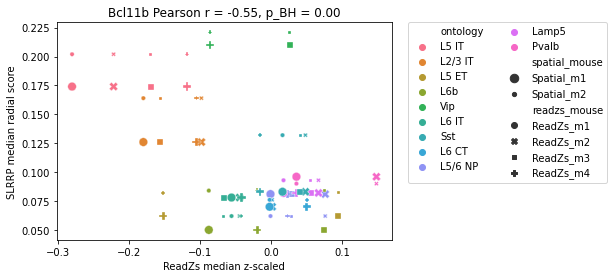

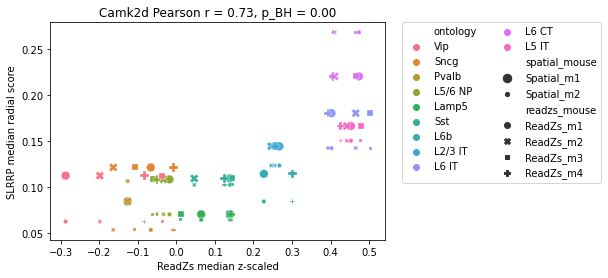

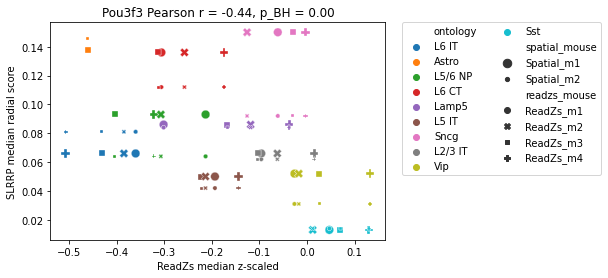

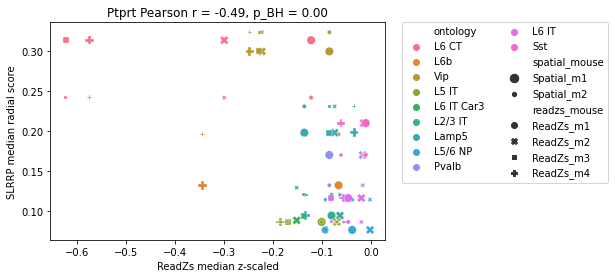

In [11]:
#Plot Pearson correlation significant gene/onts between spatial/ReadZs
#implemented other filtering as well on effect size of correlation and minimum required samples
filt_m = m[
    m['corr_p_BH'].le(0.05) &
    #m['corr_r'].abs().ge(0.6) &
    m['num_onts'].ge(10)
].groupby(
    ['gene']
).filter(
    lambda g: (g['readzs_mouse'].nunique() >= 3) and (g['spatial_mouse'].nunique() == 2)
)

print('num passing genes',filt_m['gene'].nunique())

pdf = matplotlib.backends.backend_pdf.PdfPages('radial_corr_readzs_genes.pdf')

for (gene,corr_p_bh,corr_r),g in filt_m.groupby(['gene','corr_p_BH','corr_r']):
    hue_order = g.groupby('ontology')['median_z_scaled'].min().sort_values().index
    
    fig = plt.figure()
    ax = sns.scatterplot(
        x = 'median_z_scaled',
        y = 'med_score',
        hue = 'ontology',
        style = 'readzs_mouse',
        size = 'spatial_mouse',
        hue_order = hue_order,
        style_order = sorted(g['readzs_mouse'].unique()),
        size_order = sorted(g['spatial_mouse'].unique()),
        data = g,
    )
    plt.title('{} Pearson r = {:.2f}, p_BH = {:.2f}'.format(gene,corr_r,corr_p_bh))
    plt.xlabel('ReadZs median z-scaled')
    plt.ylabel('SLRRP median radial score')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, ncol=2)
    plt.show(ax)
    
    pdf.savefig(fig, bbox_inches='tight')
    plt.close()
    
pdf.close()

In [12]:
filt_m['gene'].unique()

array(['Bcl11b', 'Camk2d', 'Pou3f3', 'Ptprt'], dtype=object)